<a href="https://colab.research.google.com/github/CarloGiorgio/carlogiorgio/blob/master/Magistrale/Computational%20Biophysics/pca_protein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [251]:
df=pd.read_csv('prot.csv',delim_whitespace=True)
df.head()

,Name,Letter,Vol.,Bulk.,Polarity,pI,Hyd.1,Hyd.2,Surface,Fract.
Alanine,Ala,A,67,11.50,0.00,6.00,1.8,1.6,113,0.74
Arginine,Arg,R,148,14.28,52.00,10.76,-4.5,-12.3,241,0.64
Asparagine,Asn,N,96,12.28,3.38,5.41,-3.5,-4.8,158,0.63
Asparticacid,Asp,D,91,11.68,49.70,2.77,-3.5,-9.2,151,0.62
Cysteine,Cys,C,86,13.46,1.48,5.05,2.5,2.0,140,0.91


In [252]:
names=df.columns
names=names[2:]
names

Index(['Vol.', 'Bulk.', 'Polarity', 'pI', 'Hyd.1', 'Hyd.2', 'Surface',
       'Fract.'],
      dtype='object')

In [253]:
df.shape

(20, 10)

In [254]:
#Mean and variance of the data
x=df.mean()
s=df.var()**0.5
print(x,x.shape)
print(s,s.shape)

Vol.        109.2000
Bulk.        15.3405
Polarity     13.5940
pI            6.0265
Hyd.1        -0.4900
Hyd.2        -1.3700
Surface     175.4000
Fract.        0.7365
dtype: float64 (8,)
Vol.        29.045518
Bulk.        4.649875
Polarity    21.914079
pI           1.769190
Hyd.1        2.986972
Hyd.2        4.892970
Surface     44.685333
Fract.       0.115315
dtype: float64 (8,)


In [255]:
#z transform
for i,name in enumerate(names):
  df[name]=(df[name]-x[i])/s[i]
df.describe()

,Vol.,Bulk.,Polarity,pI,Hyd.1,Hyd.2,Surface,Fract.
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-1.193490e-16,-1.110223e-16,-2.109424e-16,7.875645e-16,3.330669e-17,2.220446e-17,-1.332268e-16,5.773160e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.107038e+00,-2.567918e+00,-6.203318e-01,-1.840672e+00,-1.342497e+00,-2.233817e+00,-2.023035e+00,-1.877460e+00
25%,-6.352099e-01,-4.678620e-01,-6.068701e-01,-2.368315e-01,-1.007710e+00,-5.937089e-01,-6.747180e-01,-8.585153e-01
50%,7.918606e-02,-5.602301e-02,-5.457222e-01,-1.195462e-01,-1.205234e-01,4.434934e-01,1.253208e-01,-5.636717e-02
75%,6.042240e-01,6.735664e-01,6.518640e-02,-1.215245e-02,8.503596e-01,7.193994e-01,6.791938e-01,9.842575e-01
max,1.852265e+00,1.361219e+00,1.752572e+00,2.675518e+00,1.670588e+00,1.036180e+00,1.870860e+00,1.504570e+00


In [261]:
#take the correlation matrix
x=df.corr()
x.shape

(8, 8)

In [281]:
#diagonalize and take the matrix with the eigenvector
l,v=np.linalg.eig(x)
print(l)
print(l.shape,v.shape)

[3.57289279e+00 2.81331163e+00 7.84551075e-01 4.26892356e-01
 2.78228871e-01 3.35430364e-03 4.65933157e-02 7.41756600e-02]
(8,) (8, 8)


In [282]:
v

array([[ 5.77917170e-02,  5.84887446e-01, -1.05908398e-01,
         9.62082545e-02, -1.68693675e-01,  7.38856435e-01,
        -2.15311463e-01,  1.15623363e-01],
       [-2.21464102e-01,  4.80941380e-01, -1.69146333e-01,
         1.45311154e-01,  6.89638741e-01, -1.08982160e-01,
         3.47384727e-01, -2.48532442e-01],
       [ 4.43534187e-01,  1.04052706e-01, -1.42504076e-01,
        -7.33197524e-01,  1.61436004e-01, -1.04386126e-02,
        -2.29905261e-01, -3.94382380e-01],
       [ 1.85432656e-01,  2.52649044e-01,  9.41826220e-01,
        -2.70597776e-02,  5.33749852e-02, -3.03280668e-02,
         9.06639516e-02, -4.50077566e-02],
       [-4.92907779e-01,  3.26764495e-02,  1.27905453e-01,
        -3.54438938e-01,  3.42849243e-01, -6.65110520e-02,
        -4.94567465e-01,  4.97414419e-01],
       [-5.07834603e-01, -3.35245081e-02,  1.28866135e-01,
         1.32251326e-01, -1.85634034e-01,  1.85043820e-02,
        -4.05379234e-01, -7.12564733e-01],
       [ 1.00406654e-01,  5.658099

In [290]:
y=np.zeros((20,8))
l=0
for i in range(20):
  for j in range(8):
    y[i,j]=sum(v.T[j]*df.iloc[i,2:])

In [291]:
pd.DataFrame(y)

,0,1,2,3,4,5,6,7
0,-1.019084,-2.095526,0.740966,-0.168274,0.224295,-0.093834,-0.112966,0.079202
1,3.724122,2.247602,1.500493,-0.477892,-0.185857,-0.033739,0.233004,0.472676
2,1.080500,-1.107567,-0.266946,0.917584,-0.151343,0.034485,0.306554,0.253779
3,2.240186,-1.500789,-2.027333,-0.718046,0.311537,0.028666,0.030809,0.121977
4,-1.909017,-1.038362,0.040842,-0.857721,-0.395752,-0.009123,0.355089,0.191858
5,1.077475,-0.112866,-0.364091,1.178437,-0.170018,-0.020472,0.076788,0.173363
6,2.205312,-0.479292,-1.998051,-0.505746,0.201617,-0.034363,-0.191650,0.010211
7,-0.233210,-3.724543,1.067173,-0.218118,-0.793748,0.068194,-0.113733,0.087454
8,1.516360,0.692177,0.395611,-1.191894,-0.530920,0.008524,0.188010,-0.763838
9,-2.369109,1.181578,0.120678,-0.419180,0.533861,0.086927,-0.057084,0.190451


In [292]:
sum(y**2)/20

array([3.39424815e+00, 2.67264605e+00, 7.45323521e-01, 4.05547739e-01,
       2.64317428e-01, 3.18658846e-03, 4.42636499e-02, 7.04668770e-02])

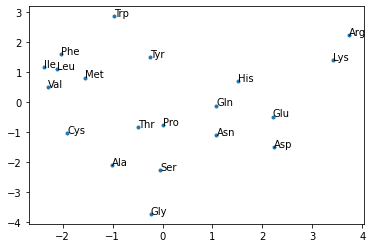

In [293]:
fig,ax=plt.subplots()
ax.scatter(y[:,0],y[:,1],marker='.')
for i, txt in enumerate(df['Name']):
    ax.annotate(txt, (y[i,0], y[i,1]))

In [166]:
from sklearn.decomposition import PCA

In [294]:
pca=PCA(2)
pca=pca.fit(df[names])
pca.explained_variance_ratio_
pca=pca.transform(df[names])

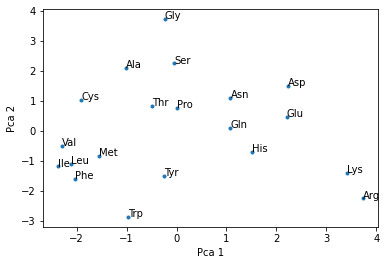

In [295]:
fig, ax = plt.subplots()
ax.scatter(pca[:,0], pca[:,1],marker='.')
ax.set_xlabel('Pca 1')
ax.set_ylabel('Pca 2')
for i, txt in enumerate(df['Name']):
    ax.annotate(txt, (pca[i,0], pca[i,1]))